Flavors of India: A Culinary Data Journey Through Culture and Regions

In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df= pd.read_csv(r"C:\Users\Deepa nayak\OneDrive\Desktop\CodeAlpha\Tak-3 (DV)\indian_food.csv")

📌 Step 1: Basic Shape & Info

In [4]:
# Number of rows and columns
print("Shape of the dataset:", df.shape)

# Column names & datatypes
print("\nData types and non-null counts:")
print(df.info())

Shape of the dataset: (255, 9)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB
None


📌 Step 2: Summary Statistics

In [5]:
# Summary stats for numeric columns
df.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


📌 Step 3: Missing Values Check

In [6]:
# Check for missing/null values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64


In [8]:
# Drop the missing value column
df.dropna(inplace=True)
# Recheck for missing/null values
df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            0
dtype: int64

📌 Step 4: Duplicate Records

In [9]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
print("\nDuplicate rows found:", duplicate_rows.shape[0])


Duplicate rows found: 0


📌 Step 5: Unique Values in Key Categorical Columns

In [10]:
# Value counts for insight
print("\nDiet types:\n", df['diet'].value_counts())
print("\nFlavor profiles:\n", df['flavor_profile'].value_counts())
print("\nCourse types:\n", df['course'].value_counts())
print("\nRegions:\n", df['region'].value_counts())


Diet types:
 diet
vegetarian        225
non vegetarian     29
Name: count, dtype: int64

Flavor profiles:
 flavor_profile
spicy     133
sweet      87
-1         29
bitter      4
sour        1
Name: count, dtype: int64

Course types:
 course
main course    129
dessert         84
snack           39
starter          2
Name: count, dtype: int64

Regions:
 region
West          74
South         59
North         49
East          31
North East    25
-1            13
Central        3
Name: count, dtype: int64


In [12]:
# Replace -1 with NaN in numeric columns
df['prep_time'] = df['prep_time'].replace(-1, np.nan)
df['cook_time'] = df['cook_time'].replace(-1, np.nan)

# Replace -1 (string or int) with 'Unknown' in object columns
for col in ['state', 'region', 'flavor_profile', 'sweet', 'spicy']:
    if col in df.columns:
        df[col] = df[col].replace(["-1", -1], "Unknown")

🔍 Analysis Goals for “Flavors of India”:

🟢 1. Category & Distribution Insights
What’s the Veg vs Non-Veg ratio?

Which course type (snack, main, dessert) is most common?

Most frequent flavor profiles?

🟡 2. Regional Patterns
Which region has the most dishes?

Top states by dish count?

Region-wise variety of courses?

🔵 3. Time-Based Patterns
Average prep time / cook time per region or course

Distribution of prep/cook time (who takes the longest?)


🛠️ Section 1: Category & Distribution Insights

✅ Veg vs Non-Veg Count

In [14]:
df['diet'].value_counts()

diet
vegetarian        225
non vegetarian     29
Name: count, dtype: int64

✅ Distribution of Courses

In [15]:
df['course'].value_counts()

course
main course    129
dessert         84
snack           39
starter          2
Name: count, dtype: int64

✅ Distribution of Flavor Profiles

In [16]:
df['flavor_profile'].value_counts()

flavor_profile
spicy      133
sweet       87
Unknown     29
bitter       4
sour         1
Name: count, dtype: int64

🟡 Section 2: Regional & State-wise Patterns

✅ 1. Region-wise Dish Count

In [17]:
df['region'].value_counts()

region
West          74
South         59
North         49
East          31
North East    25
Unknown       13
Central        3
Name: count, dtype: int64

✅ 2. State-wise Dish Count (Top 10)

In [18]:
df['state'].value_counts().head(10)

state
Gujarat           35
Punjab            32
Maharashtra       30
West Bengal       24
Unknown           24
Assam             21
Tamil Nadu        20
Andhra Pradesh    10
Kerala             8
Uttar Pradesh      8
Name: count, dtype: int64

✅ 3. Number of Unique Dishes per Region

In [19]:
df.groupby('region')['name'].nunique().sort_values(ascending=False)

region
West          74
South         59
North         49
East          31
North East    25
Unknown       13
Central        3
Name: name, dtype: int64

✅ 4. Variety of Courses by Region

In [20]:
df.groupby('region')['course'].value_counts()

region      course     
Central     dessert         1
            main course     1
            snack           1
East        dessert        21
            main course    10
North       main course    37
            dessert         9
            starter         2
            snack           1
North East  main course    18
            dessert         7
South       main course    31
            dessert        18
            snack          10
Unknown     dessert         5
            main course     4
            snack           4
West        main course    28
            dessert        23
            snack          23
Name: count, dtype: int64

🔵 Section 3: Time-Based Patterns

✅ 1. Average Prep Time by Course

In [21]:
df.groupby('course')['prep_time'].mean().sort_values(ascending=False)

course
starter        180.000000
snack           56.388889
dessert         30.223684
main course     29.681818
Name: prep_time, dtype: float64

✅ 2. Average Cook Time by Region

In [22]:
df.groupby('region')['cook_time'].mean().sort_values(ascending=False)

region
Central       48.333333
North         41.979167
West          41.880597
East          41.607143
South         36.909091
North East    28.461538
Unknown       23.083333
Name: cook_time, dtype: float64

✅ 3. Dishes with Highest Prep Time (Top 5)

In [23]:
df[['name', 'prep_time']].sort_values(by='prep_time', ascending=False).head(5)

,name,prep_time
114,Pindi chana,500.0
155,Puttu,495.0
29,Misti doi,480.0
130,Idli,360.0
128,Dosa,360.0


✅ 4. Distribution of Cook Time

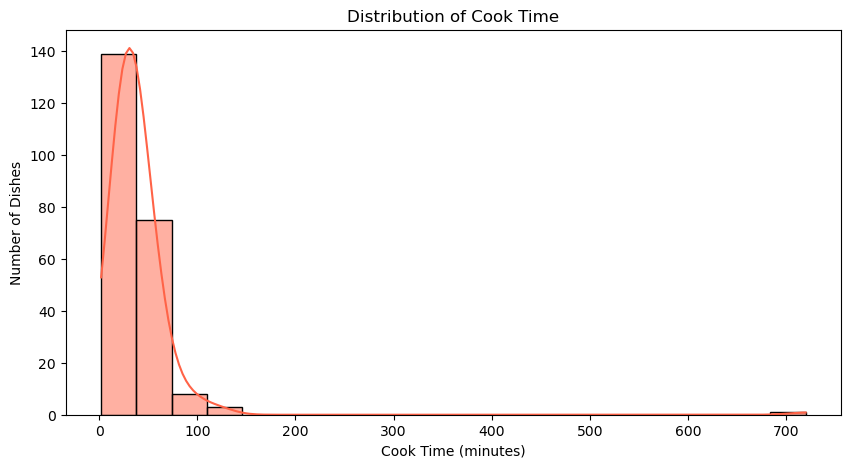

In [24]:
plt.figure(figsize=(10,5))
sns.histplot(df['cook_time'].dropna(), bins=20, kde=True, color='tomato')
plt.title('Distribution of Cook Time')
plt.xlabel('Cook Time (minutes)')
plt.ylabel('Number of Dishes')
plt.show()